In [12]:
import numpy as np
import pandas as pd
from scipy import stats

import dowhy
from dowhy import CausalModel

from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
from causalgraphicalmodels import CausalGraphicalModel
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import graphviz

In [2]:
COLORS = [
    '#00B0F0',
    '#FF0000'
]

In [9]:
data = pd.read_csv('Energy_Prices__Dollars_per_Million_Btu__Beginning_1970.csv')

In [11]:


data = data.fillna(method='ffill')
print(data.head())

   Year  GDP Deflator          Sector  Coal  Distillate  Residual  Kerosene  \
0  1970      0.143282      Commercial  0.48        1.14      0.42      0.73   
1  1970      0.143282      Industrial  0.53        0.70      0.49      0.73   
2  1970      0.143282     Residential  1.43        1.43      0.49      1.56   
3  1970      0.143282  Transportation  1.43        1.44      0.37      1.56   
4  1971      0.149432      Commercial  0.56        1.21      0.53      0.79   

   Propane  Natural Gas  Electricity  Wood  Motor Gasoline  Jet Fuel  
0     1.42         1.17         7.80   NaN             NaN       NaN  
1     1.50         0.68         3.51   NaN             NaN       NaN  
2     2.65         1.37         8.83   0.4             NaN       NaN  
3     1.42         0.00         4.82   0.4            2.92      0.72  
4     1.39         1.24         8.92   0.4            2.92      0.72  


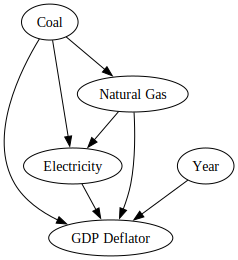

In [17]:
dag = CausalGraphicalModel(
    nodes=["Year", "GDP Deflator", "Coal",'Natural Gas',"Electricity"],
    edges=[
        ("Year", "GDP Deflator"),
        ("Coal","GDP Deflator"),
        ("Natural Gas","GDP Deflator"),
        ("Electricity","GDP Deflator"),
        ("Coal","Natural Gas"),
        ("Coal", "Electricity"),
        ("Natural Gas", "Electricity"),

    ]
)
dag.draw()

In [19]:
treatment = "Coal"
outcome = "GDP Deflator"

# Build the causal model
model = CausalModel(
    data=data,
    treatment=treatment,
    outcome=outcome,
)

# Identify the causal effect
identified_estimand = model.identify_effect()
print("Identified Estimand:", identified_estimand)

# Estimate the causal effect using a regression-based method
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"  # Use linear regression for continuous treatment
)
print("\nCausal Estimate (Linear Regression):", causal_estimate)

# Refutation: Robustness Check
refutation = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause",
)
print("\nRefutation Result (Random Common Cause):", refutation)

Identified Estimand: Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                    
───────(E[GDP Deflator])
d[Coal]                 
Estimand assumption 1, Unconfoundedness: If U→{Coal} and U→GDP Deflator then P(GDP Deflator|Coal,,U) = P(GDP Deflator|Coal,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}

Causal Estimate (Linear Regression): *** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                    
───────(E[GDP Deflator])
d[Coal]                 
Estimand assumption 1, Unconfoundedness: If U→{Coal} and U→GDP Deflator then P(GDP Deflator